In [1]:
#dataset source: https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
folder = '/content/drive/MyDrive/ML/' # podaj lokalizację pliku

In [43]:
import numpy as np
import pandas as pd
mails = pd.read_csv(folder + 'spam.csv', encoding='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
mails = mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
mails = mails.rename(columns={"v1": "classif", "v2": "text"})
mails.head()


,classif,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
mails.shape

(5572, 2)

In [21]:
mails['text'][44]

'Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...'

In [45]:
mails['classif'][44]

'ham'

In [22]:
!pip install wordcloud
import wordcloud

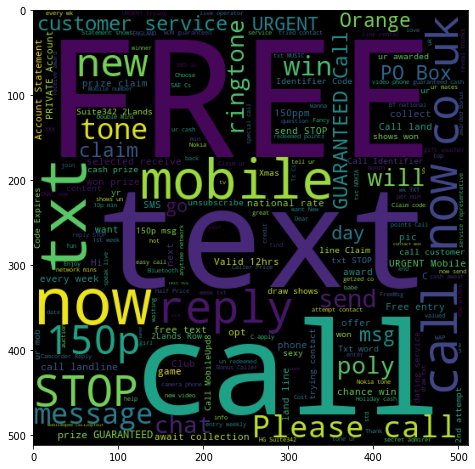

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#SPAM
spam_words = " ".join(list(mails [mails['classif']=='spam']['text'] ))
spam_plot = WordCloud(width = 512, height = 512).generate(spam_words)

plt.figure(figsize=(10,8))
plt.imshow(spam_plot)

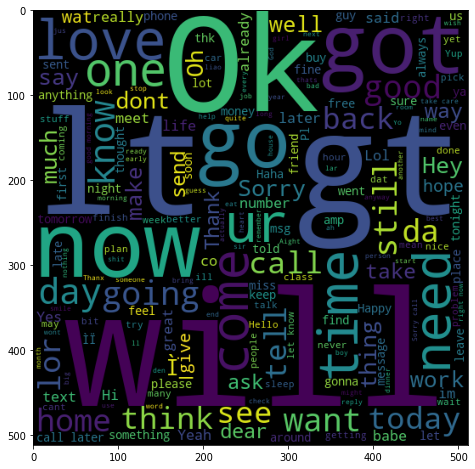

In [47]:
#NOT SPAM
ham_words = " ".join(list(mails [mails['classif']=='ham']['text'] ))
ham_plot = WordCloud(width = 512, height = 512).generate(ham_words)

plt.figure(figsize=(10,8))
plt.imshow(ham_plot)

In [52]:
from sklearn.model_selection import train_test_split

X = mails.text
y = mails.classif
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
X_train = vectorizer.fit_transform(X_train)

In [53]:
print("Data_train: n_samples: %d, n_features: %d" % X_train.shape)

Data_train: n_samples: 3900, n_features: 7193


In [54]:
X_test = vectorizer.transform(X_test)
print("Data_test: n_samples: %d, n_features: %d" % X_test.shape)

Data_test: n_samples: 1672, n_features: 7193


In [55]:
feature_names = vectorizer.get_feature_names()
feature_names = np.asarray(feature_names)

In [56]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
accur = accuracy_score(y_test,y_pred) 
print("Accuracy: %0.3f" % accur)
print("Classification report:") 
print(classification_report(y_test,y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.981
Classification report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1431
        spam       0.96      0.90      0.93       241

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion matrix:
[[1423    8]
 [  23  218]]


In [61]:
print("Marked as possibly coming from spam:")
top10 = np.argsort(clf.coef_[0])[-10:]
bottom10 = np.argsort(clf.coef_[0])[:10]
print(feature_names[top10])

print("Not important during classification")
print(feature_names[bottom10])

Marked as possibly coming from spam:
['txt' 'or' 'for' 'now' 'the' 'free' 'your' 'you' 'call' 'to']
Not important during classification
['keen' 'needed' 'needa' 'ned' 'necklace' 'neck' 'necessity' 'necessary'
 'necessarily' 'nearer']
